In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

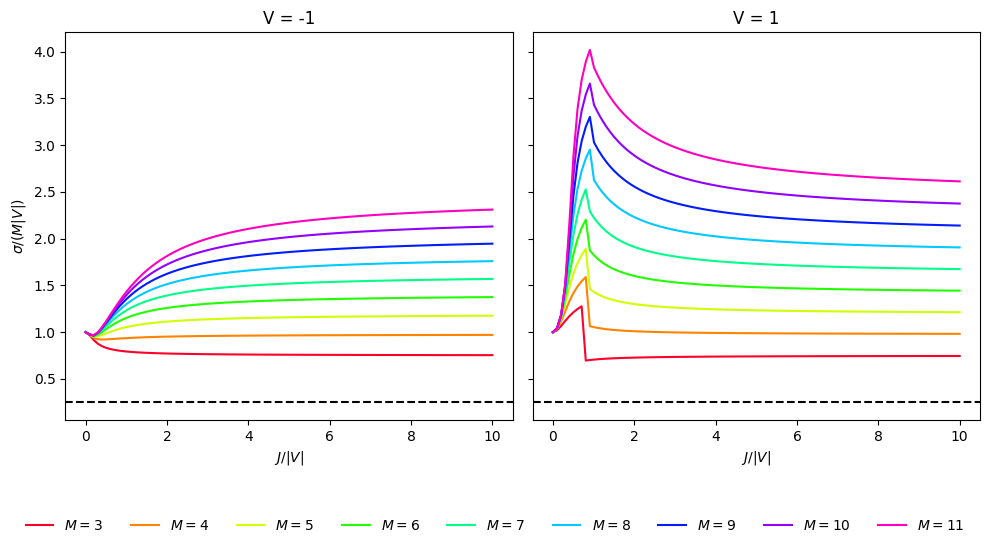

In [17]:
N = 2
Ms = range(3,12)
colors = get_cmap("gist_rainbow", len(Ms))

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
lines = []
labels = []

for V in [-1, 1]:
    if V == -1:
        ax = ax1
    else:
        ax = ax2

    for idx, M in enumerate(Ms):
        states, _ = enumerate_states(N, M)

        J_V_ratios = np.linspace(0, 10, 100)
        mu_V_ratio = 0
        normalized_sigmas = []
        sigmas = []

        for J_V_ratio in J_V_ratios:
            H = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, eigenvectors = exact_diagonalize(H)
            sigma = sigma_ij(i=0, j=1, wavefunction=eigenvectors[0], states=states, N=N, M=M)
            sigmas.append(sigma)
            normalized_sigmas.append(sigma / M)

        line, = ax.plot(J_V_ratios, sigmas, "-", color=colors(idx), label=f"$M={M}$")

        # line, = ax.plot(J_V_ratios, normalized_sigmas, "-", color=colors(idx), label=f"$M={M}$")
        #ax.plot(J_V_ratios, normalized_sigmas, ".", color=colors(idx))
        if V == -1:  
            lines.append(line)
            labels.append(f"$M={M}$")

        ax.set_xlabel("$J/|V|$")
        ax.set_title(f"V = {V}")

ax1.set_ylabel("$\sigma/(M|V|)$")

"""ax1.set_ylim(0,0.5)
ax2.set_ylim(0,0.5)"""

ax1.axhline(0.25, color="black", linestyle="--")
ax2.axhline(0.25, color="black", linestyle="--")

fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=9, frameon=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  
plt.show()

